
1. does duplicate gameweeks values need to be removed or are they double gameweeksfor gameweeks less than 4. the form will be current gameweeks / 10 or how will it be calculated.
2. the largest sum of total points on average per position. per season or for all season.
3. 2B - how to find the highest form. is it the average or what


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

In [4]:
# the main dataset

df = pd.read_csv('./data/archive/cleaned_merged_seasons.csv')  
df.head() # This shows you the first 5 rows of the table!

/var/folders/m0/m60fjz952_l28k4w5jsnj12h0000gn/T/ipykernel_4179/3041352236.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/archive/cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [5]:
df['position'].unique()
df[df['position'] == "GKP"]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
68045,2021-22,Bernd Leno,GKP,Arsenal,0,0,0,0,0.0,1,...,2.0,0.0,0,-422,216,638,45,False,0,37
68072,2021-22,Nick Pope,GKP,Burnley,0,0,20,0,0.0,112,...,1.0,0.0,3,-235,10433,10668,53,False,1,37
68073,2021-22,Nick Pope,GKP,Burnley,0,1,26,0,0.0,112,...,1.0,0.0,5,-235,10433,10668,53,False,0,37
68076,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
68077,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68861,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68862,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68904,2021-22,David Raya Martin,GKP,Brentford,0,0,18,0,0.0,80,...,2.0,0.0,2,8656,16108,7452,43,False,0,37
68917,2021-22,Ellery Balcombe,GKP,Brentford,0,0,0,0,0.0,92,...,2.0,0.0,0,-3,0,3,40,False,0,37


In [6]:
# the list of teams in each year

temp_df = pd.read_csv('./data/archive/master_team_list.csv')  
temp_df.head(101) # This shows you the first 5 rows of the table!

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace
...,...,...,...
96,2020-21,17,Spurs
97,2020-21,18,West Brom
98,2020-21,19,West Ham
99,2020-21,20,Wolves


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [8]:
df.describe() 

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [9]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

<Axes: >

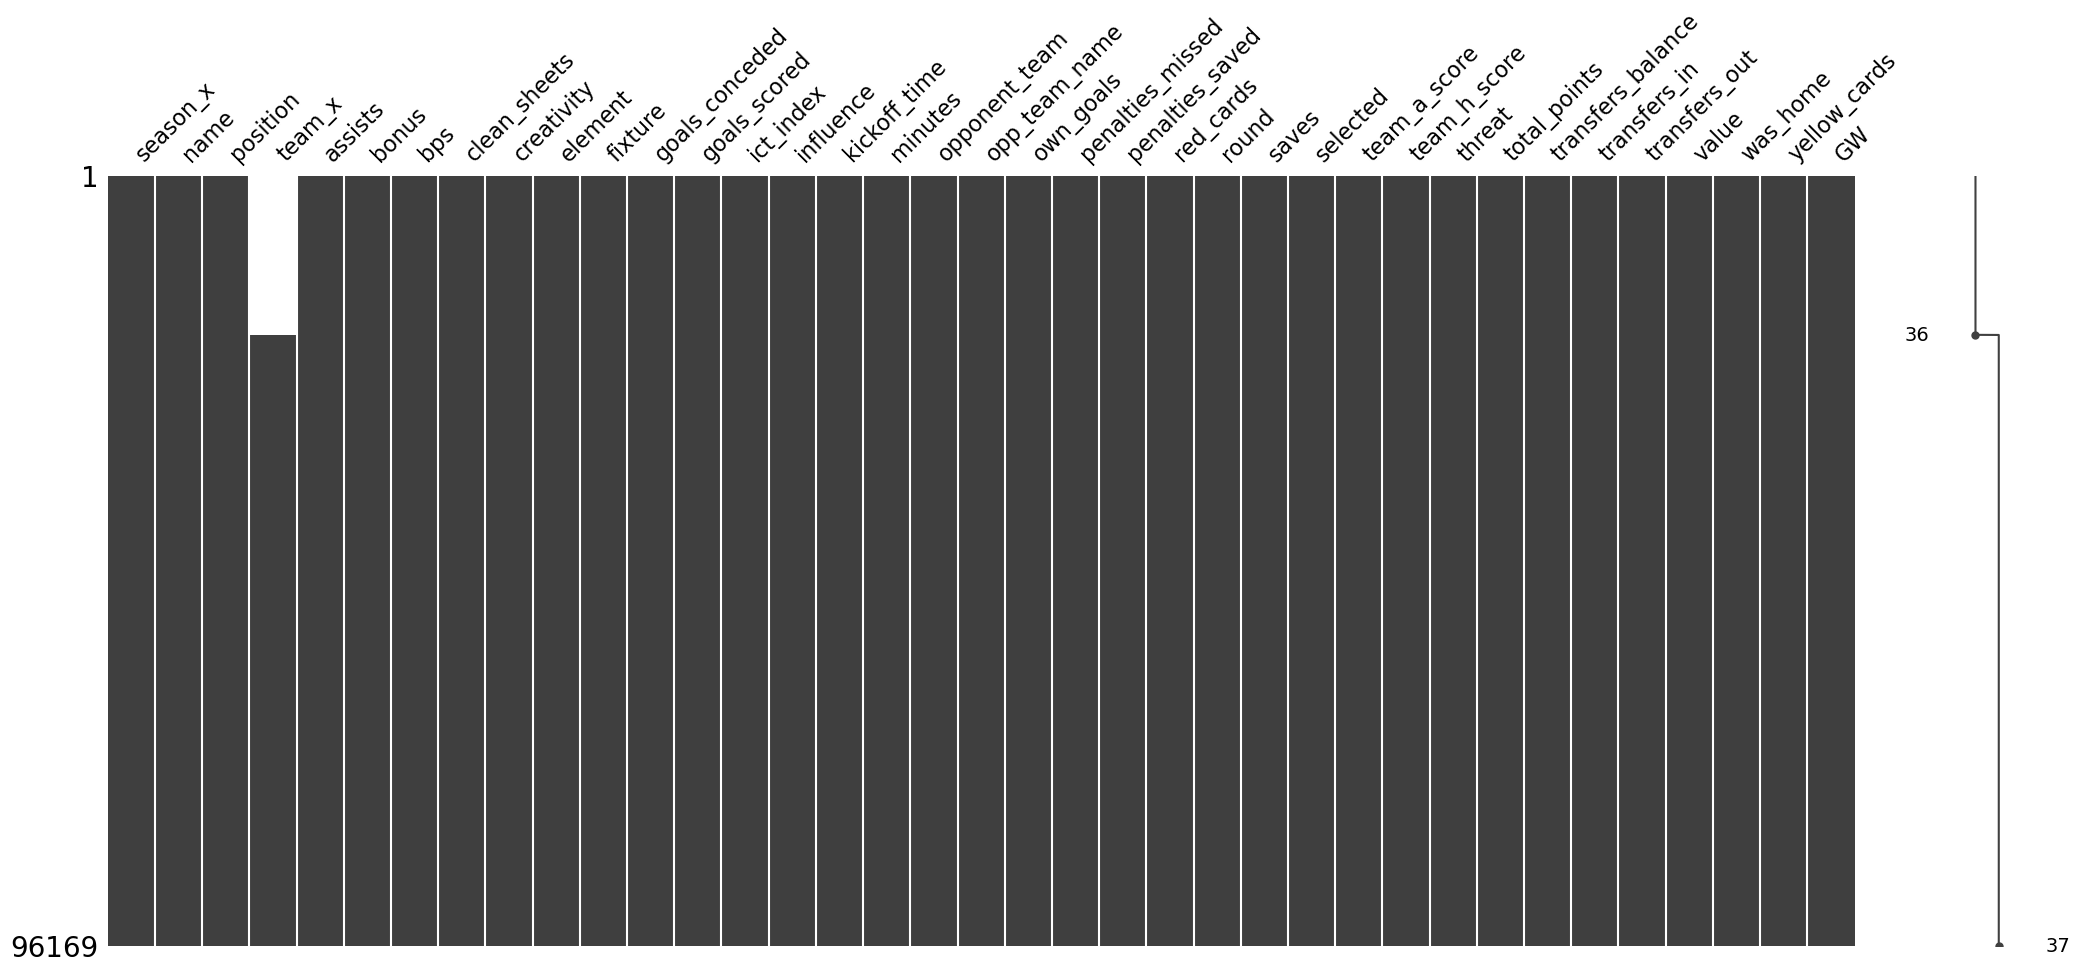

In [10]:
msno.matrix(df)

In [11]:
# listing the list of attributes in the dataset

df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

In [12]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs

df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/var/folders/m0/m60fjz952_l28k4w5jsnj12h0000gn/T/ipykernel_4179/800715512.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

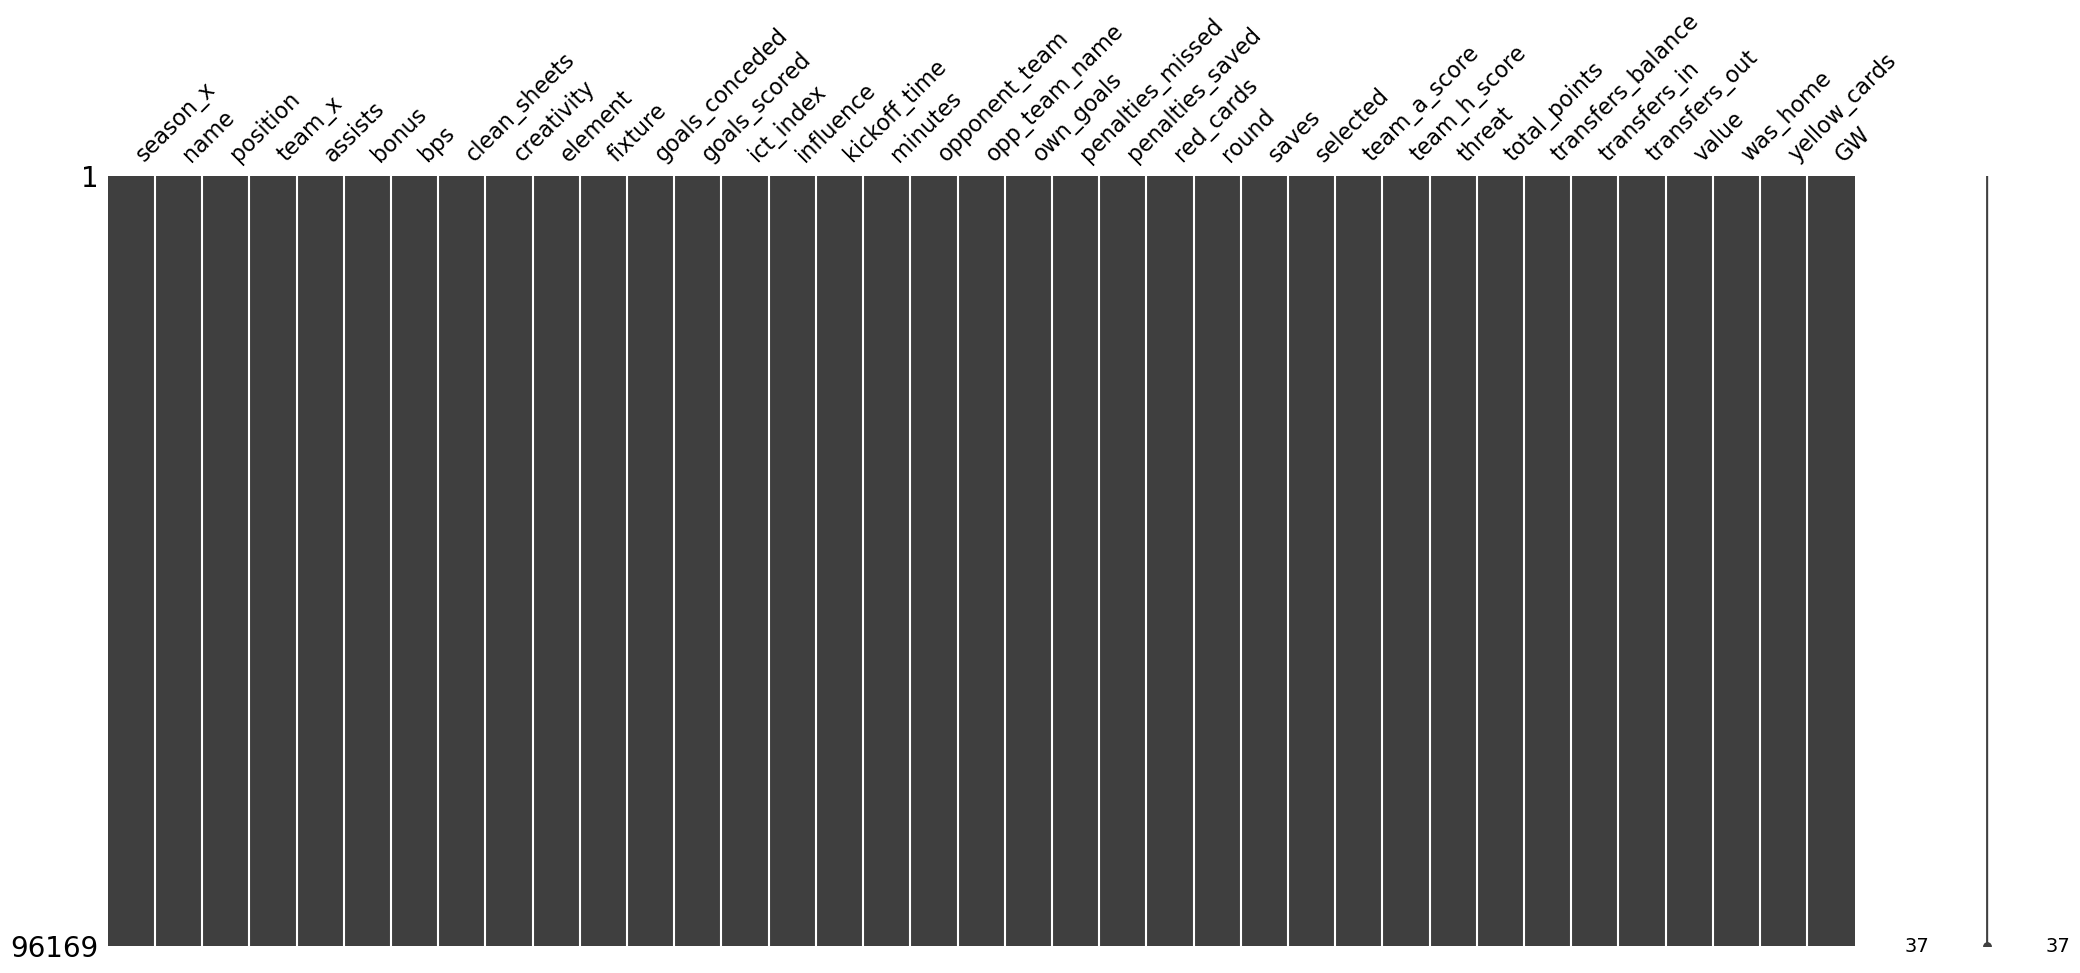

In [13]:
# checking if there is still nan values
msno.matrix(df)

In [14]:
# finding duplicate cells

dupe_groups = (
    
    df.groupby(["name", "GW", "season_x"])
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

                  name  GW season_x  count
41      Aaron Connolly  22  2021-22      2
46      Aaron Connolly  25  2021-22      2
54      Aaron Connolly  29  2021-22      2
61      Aaron Connolly  33  2021-22      2
161    Aaron Cresswell  19  2020-21      2
...                ...  ..      ...    ...
90212   Çaglar Söyüncü  36  2021-22      2
90215   Çaglar Söyüncü  37  2021-22      2
90235     Ørjan Nyland  19  2020-21      2
90242     Ørjan Nyland  26  2020-21      2
90251     Ørjan Nyland  35  2020-21      2

[5860 rows x 4 columns]


In [15]:
# printing a cell to ensuring that the cell is duplicate

df[(df["name"] == "Çaglar Söyüncü") & (df["GW"] == 36) & (df["season_x"] == "2021-22")]

salah_2017 = df.loc[(df["name"] == "Çaglar Söyüncü") & (df["season_x"] == "2021-22")]
salah_2017.count()

season_x             38
name                 38
position             38
team_x               38
assists              38
bonus                38
bps                  38
clean_sheets         38
creativity           38
element              38
fixture              38
goals_conceded       38
goals_scored         38
ict_index            38
influence            38
kickoff_time         38
minutes              38
opponent_team        38
opp_team_name        38
own_goals            38
penalties_missed     38
penalties_saved      38
red_cards            38
round                38
saves                38
selected             38
team_a_score         38
team_h_score         38
threat               38
total_points         38
transfers_balance    38
transfers_in         38
transfers_out        38
value                38
was_home             38
yellow_cards         38
GW                   38
dtype: int64

In [16]:
# removed duplicated cells

df = df.drop_duplicates(subset=["name", "GW", "season_x"], keep="first")

dupe_groups = (
    df.groupby(["name", "GW", "season_x"]) 
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

Empty DataFrame
Columns: [name, GW, season_x, count]
Index: []


In [17]:
# ensuring that there is a cell for each gameweek

salah_2017 = df.loc[(df["name"] == "Mohamed Salah") & (df["season_x"] == "2017-18")]
salah_2017.count()

season_x             38
name                 38
position             38
team_x               38
assists              38
bonus                38
bps                  38
clean_sheets         38
creativity           38
element              38
fixture              38
goals_conceded       38
goals_scored         38
ict_index            38
influence            38
kickoff_time         38
minutes              38
opponent_team        38
opp_team_name        38
own_goals            38
penalties_missed     38
penalties_saved      38
red_cards            38
round                38
saves                38
selected             38
team_a_score         38
team_h_score         38
threat               38
total_points         38
transfers_balance    38
transfers_in         38
transfers_out        38
value                38
was_home             38
yellow_cards         38
GW                   38
dtype: int64

In [18]:
# 1️⃣ Sort by player, season, and gameweek
df = df.sort_values(by=["name", "season_x", "GW"]).reset_index(drop=True)
# df.head(100)
# 2️⃣ Now shift total_points correctly
df["upcoming_total_points"] = (
    df.groupby(["name", "season_x"])["total_points"].shift(-1)
)

df.isnull().sum()

season_x                    0
name                        0
position                    0
team_x                      0
assists                     0
bonus                       0
bps                         0
clean_sheets                0
creativity                  0
element                     0
fixture                     0
goals_conceded              0
goals_scored                0
ict_index                   0
influence                   0
kickoff_time                0
minutes                     0
opponent_team               0
opp_team_name               0
own_goals                   0
penalties_missed            0
penalties_saved             0
red_cards                   0
round                       0
saves                       0
selected                    0
team_a_score                0
team_h_score                0
threat                      0
total_points                0
transfers_balance           0
transfers_in                0
transfers_out               0
value     

<Axes: >

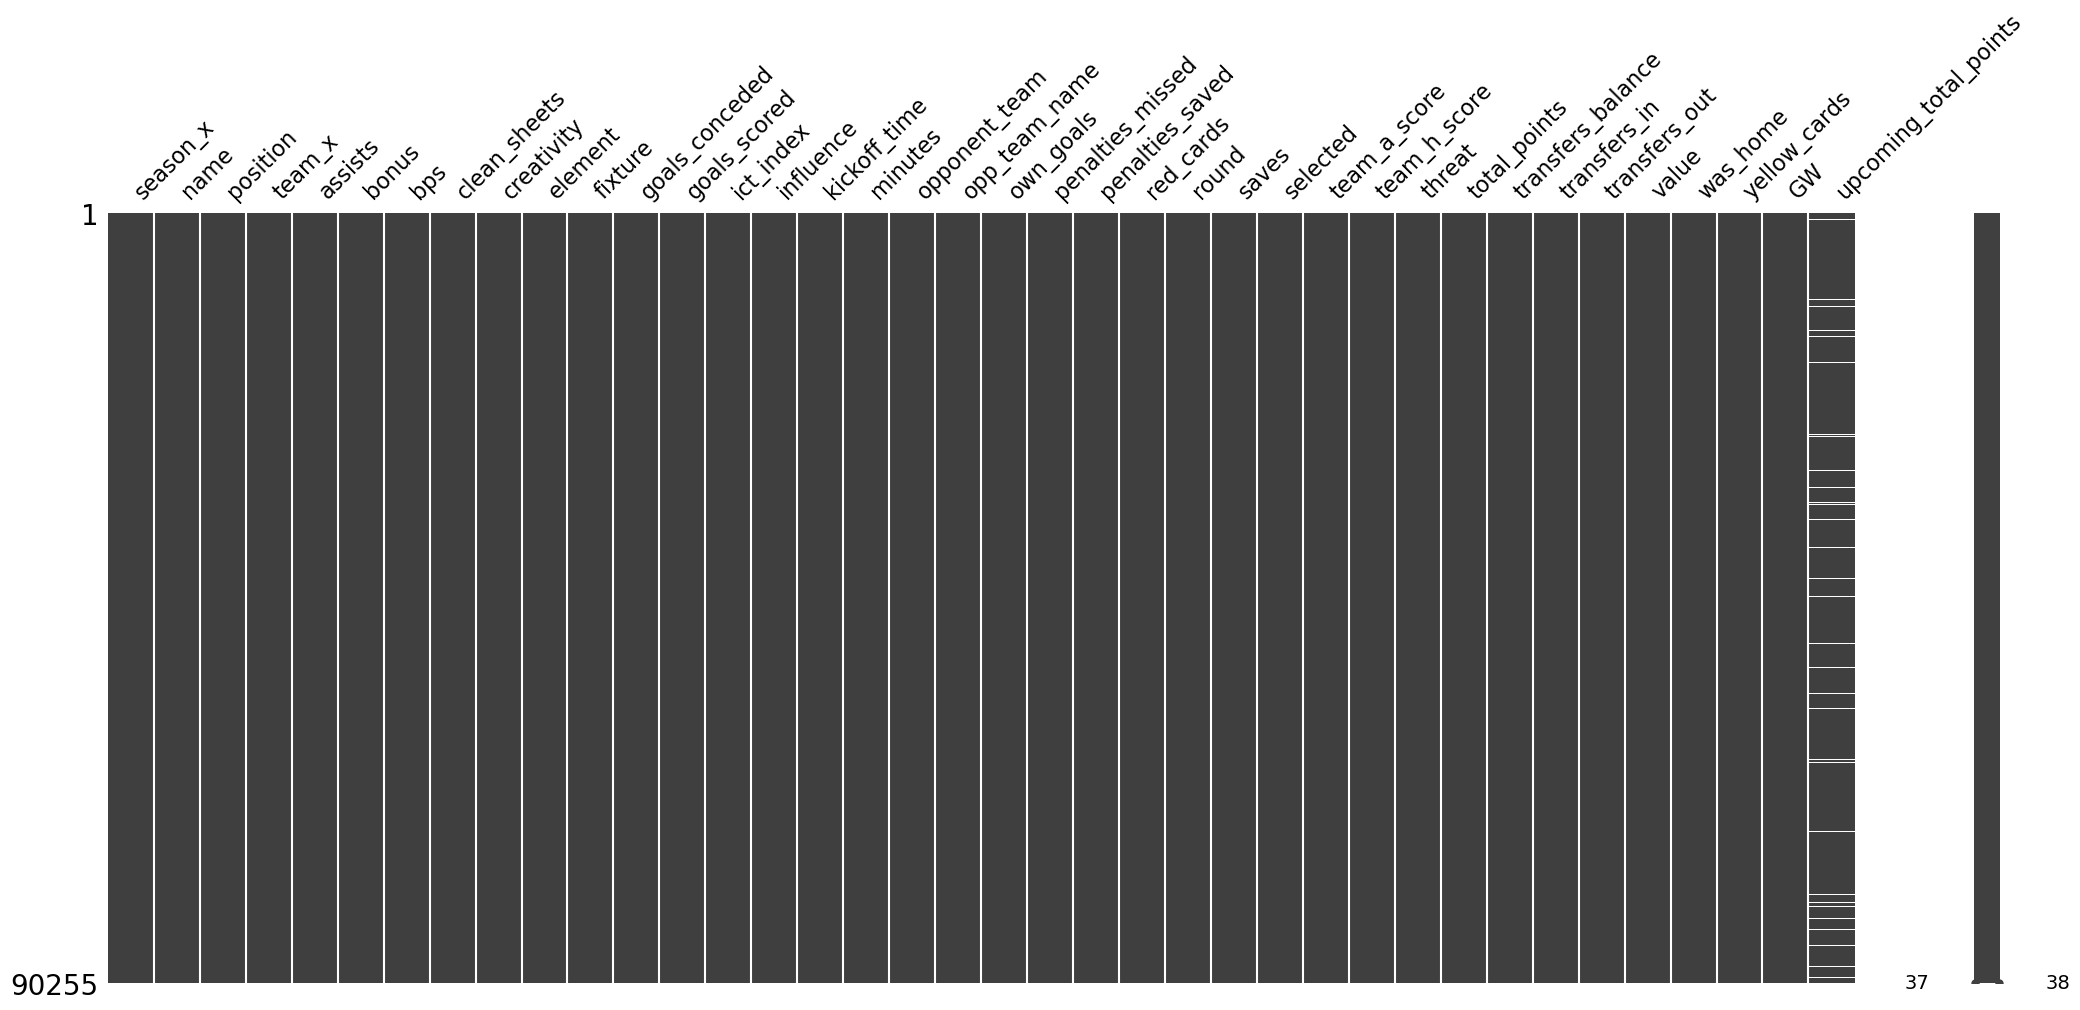

In [19]:
# checking if there is still nan values
msno.matrix(df)

In [20]:
nan_rows = df[df["upcoming_total_points"].isna()]

# print(nan_rows[["name", "season_x", "GW", "upcoming_total_points"]])
for idx, row in nan_rows.iterrows():
    if(row["GW"] != 38 ): 
        print(row[["name", "season_x", "GW", "upcoming_total_points"]])

In [ ]:
# salah_2017 = df.loc[(df["name"] == "Aaron Cresswell") & (df["season_x"] == "2016-17")]
# salah_2017.count()

# for idx, row in salah_2017.iterrows():
#     print(row)
#     print(f"__________________________")

In [22]:
# df.loc[df["name"] == "MVictor Lindelöf", ["season_x" == "2017-18", "GW", "total_points", "upcoming_total_points"]]

df[(df["GW"] == 10) & (df["season_x"] == "2017-18") & (df["name"] == "MVictor Lindelöf")]
# df[(df["GW"] == 10) & (df["season_x"] == "2017-18")]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,upcoming_total_points
